/tmp/ipykernel_418/1721011409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TOT_EMP'] = pd.to_numeric(filtered_df['TOT_EMP'], errors='coerce')


51


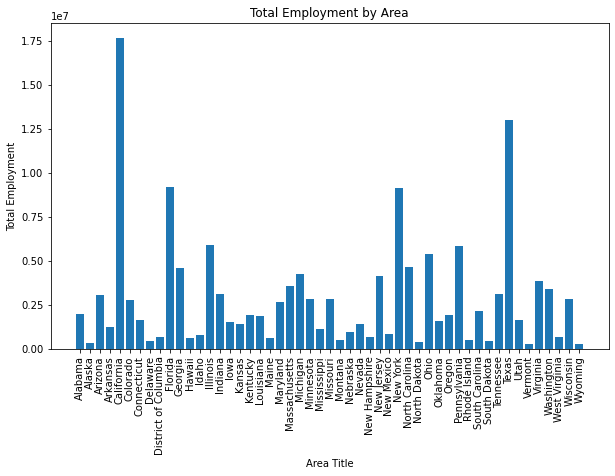

0                    Alabama
23                    Alaska
46                   Arizona
69                  Arkansas
92                California
115                 Colorado
138              Connecticut
161                 Delaware
184     District of Columbia
207                  Florida
230                  Georgia
253                   Hawaii
276                    Idaho
299                 Illinois
322                  Indiana
345                     Iowa
368                   Kansas
391                 Kentucky
414                Louisiana
437                    Maine
460                 Maryland
483            Massachusetts
506                 Michigan
529                Minnesota
552              Mississippi
575                 Missouri
598                  Montana
621                 Nebraska
644                   Nevada
667            New Hampshire
690               New Jersey
713               New Mexico
736                 New York
759           North Carolina
782           

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read an Excel file
file_path = 'filtered_state_M2022_dl.csv'  # Replace with your Excel file path
df = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

# Plot a bar chart
plt.figure(figsize=(10, 6))
# Convert 'TOT_EMP' to numeric, if it's not already
filtered_df['TOT_EMP'] = pd.to_numeric(filtered_df['TOT_EMP'], errors='coerce')
print(len(filtered_df['AREA_TITLE']))

plt.bar(filtered_df['AREA_TITLE'], filtered_df['TOT_EMP'])
plt.xlabel('Area Title')
plt.ylabel('Total Employment')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.title('Total Employment by Area')

# Adjust the y-axis to better display the data
plt.yscale('linear')  # Ensures a linear scale for y-axis

plt.show()
print(filtered_df['AREA_TITLE'])
# print(filtered_df['TOT_EMP'])

/tmp/ipykernel_418/1174226088.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['A_MEDIAN'] = pd.to_numeric(filtered_data['A_MEDIAN'], errors='coerce')
/tmp/ipykernel_418/1174226088.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['TOT_EMP'] = pd.to_numeric(filtered_data['TOT_EMP'], errors='coerce')


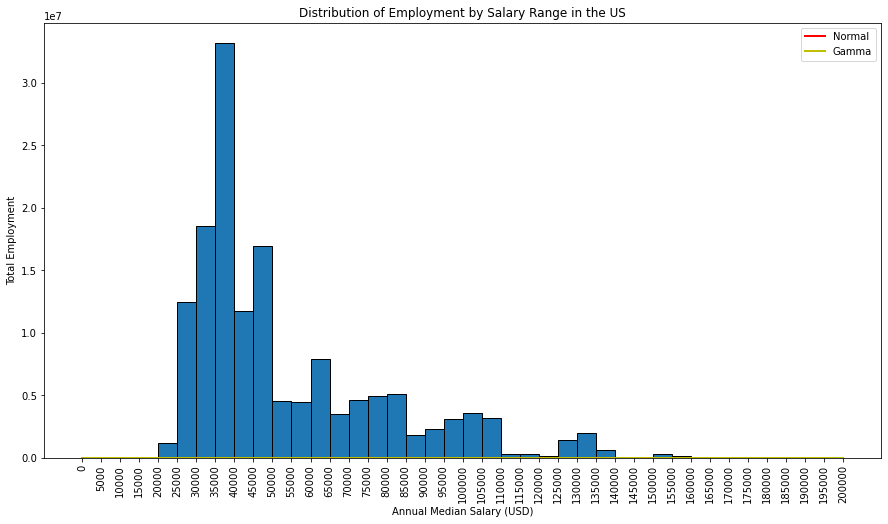

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import lognorm, weibull_min, gamma
import pandas as pd

# Load the data from the provided CSV file
file_path = 'filtered_state_M2022_dl.csv'
data = pd.read_csv(file_path)

# Filter out the row with "All Occupations" in "OCC_TITLE"
filtered_data = data[data['OCC_TITLE'] != 'All Occupations']

# Convert A_MEDIAN and TOT_EMP columns to numeric, handling errors and missing values
filtered_data['A_MEDIAN'] = pd.to_numeric(filtered_data['A_MEDIAN'], errors='coerce')
filtered_data['TOT_EMP'] = pd.to_numeric(filtered_data['TOT_EMP'], errors='coerce')

# Drop rows with NaN values in these columns as they are essential for the analysis
filtered_data = filtered_data.dropna(subset=['A_MEDIAN', 'TOT_EMP'])

# Adjusting the bins for even finer granularity
finer_bins = list(range(0, 200001, 5000))  # Creating bins every $5000

# Create the histogram with the finest granularity
plt.figure(figsize=(15, 8))
plt.hist(filtered_data['A_MEDIAN'], bins=finer_bins, weights=filtered_data['TOT_EMP'], edgecolor='black')


# Fit and plot various distributions
# Normal Distribution
norm_params = stats.norm.fit(filtered_data['A_MEDIAN'])
norm_dist_fitted = stats.norm(*norm_params)
plt.plot(finer_bins, norm_dist_fitted.pdf(finer_bins), 'r-', lw=2, label='Normal')

# Gamma Distribution
gamma_params = gamma.fit(filtered_data['A_MEDIAN'])
gamma_dist_fitted = gamma(*gamma_params[:-2], loc=gamma_params[-2], scale=gamma_params[-1])
plt.plot(finer_bins, gamma_dist_fitted.pdf(finer_bins), 'y-', lw=2, label='Gamma')


# Set the labels and title for the finest granularity
plt.xlabel('Annual Median Salary (USD)')
plt.ylabel('Total Employment')
plt.title('Distribution of Employment by Salary Range in the US')
plt.legend(loc='upper right')
plt.xticks(finer_bins, rotation=90)

# Show the histogram
plt.show()


In [7]:
import pandas as pd

# Load the dataset
file_path = 'filtered_state_M2022_dl.csv'
data = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

# Calculate the mean and variance of 'A_MEAN' among different occupations within each state
mean_among_occupations = data.groupby('AREA_TITLE')['A_MEDIAN'].mean()
variance_among_occupations = data.groupby('AREA_TITLE')['A_MEDIAN'].var()

# Combine the results into a single DataFrame for display
variance_among_occupations_df = pd.DataFrame({
    'Mean Among Occupations': mean_among_occupations, 
    'Variance Among Occupations': variance_among_occupations
}).reset_index()

# Display the DataFrame
variance_among_occupations_df.head()


,AREA_TITLE,Mean Among Occupations,Variance Among Occupations
0,Alabama,48216.521739,4.512355e+08
1,Alaska,59715.217391,4.891233e+08
2,Arizona,52545.652174,4.328109e+08
3,Arkansas,45261.739130,2.661415e+08
4,California,66185.217391,1.070270e+09


In [8]:
import pandas as pd
from scipy import stats

file_path = 'filtered_state_M2022_dl.csv'
df = pd.read_csv(file_path)

# Step 1: Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']

mean_across_states = filtered_df['A_MEAN']

# Z-scores for the 25th and 75th percentiles for a normal distribution
z_75 = stats.norm.ppf(0.75)
z_25 = stats.norm.ppf(0.25)
# print(z_25, z_75)

# Calculate the standard deviation based on IQR and Z-scores
filtered_df['estimated_std_dev'] = (pd.to_numeric(filtered_df['A_PCT75']) - pd.to_numeric(filtered_df['A_PCT25'])) / (z_75 - z_25)

# The variance is the square of the standard deviation
filtered_df['estimated_variance'] = filtered_df['estimated_std_dev'] ** 2

print(filtered_df[['AREA_TITLE', 'estimated_std_dev', 'estimated_variance']])


                AREA_TITLE  estimated_std_dev  estimated_variance
0                  Alabama       23840.243674        5.683572e+08
23                  Alaska       31957.490820        1.021281e+09
46                 Arizona       23521.484197        5.532602e+08
69                Arkansas       19718.609506        3.888236e+08
92              California       35752.952499        1.278274e+09
115               Colorado       32202.120186        1.036977e+09
138            Connecticut       34233.285225        1.171918e+09
161               Delaware       32661.726874        1.066788e+09
184   District of Columbia       60215.889105        3.625953e+09
207                Florida       24396.219506        5.951755e+08
230                Georgia       27035.251454        7.309048e+08
253                 Hawaii       29073.829505        8.452876e+08
276                  Idaho       22520.727699        5.071832e+08
299               Illinois       31631.318332        1.000540e+09
322       

/tmp/ipykernel_418/2411929249.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['estimated_std_dev'] = (pd.to_numeric(filtered_df['A_PCT75']) - pd.to_numeric(filtered_df['A_PCT25'])) / (z_75 - z_25)
/tmp/ipykernel_418/2411929249.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['estimated_variance'] = filtered_df['estimated_std_dev'] ** 2


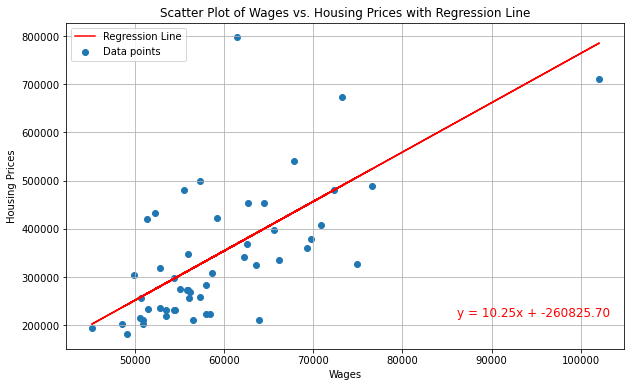

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
file_path = 'filtered_state_M2022_dl.csv'
df = pd.read_csv(file_path)
file_path_housing = 'filtered_housing_prices.csv'
df_housing = pd.read_csv(file_path_housing)

# Filter out the row
filtered_df = df[df['OCC_CODE'] == '00-0000']
mean_wages = filtered_df['A_MEAN']
housing_prices = df_housing['Mean of Median of housing price']

# Convert to numpy arrays for compatibility with newer pandas versions
mean_wages_np = mean_wages.to_numpy()
housing_prices_np = housing_prices.to_numpy()

# Perform linear regression
X = mean_wages_np.reshape(-1, 1)  # Reshape if necessary
y = housing_prices_np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions for the entire dataset
y_pred = regr.predict(X)

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(mean_wages_np, housing_prices_np, label='Data points')
plt.plot(mean_wages_np, y_pred, color='red', label='Regression Line')

# Annotate with the equation of the line in the bottom right
slope = regr.coef_[0]
intercept = regr.intercept_
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(line_eq, xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12, color='red')

# Add plot details
plt.title('Scatter Plot of Wages vs. Housing Prices with Regression Line')
plt.xlabel('Wages')
plt.ylabel('Housing Prices')
plt.grid(True)
plt.legend()
plt.show()
